# Banknote dimensions

Which banknotes exhibit the greatest size differences between denominations? Which are the largest overall?

Banknote dimensions differ widely across countries.

The size of a banknote impacts its practicality. Uniform dimensions enhance durability by ensuring a snug wallet fit, while also enabling vending machines and ATMs to process them seamlessly. Conversely, varied sizes assist the visually impaired in distinguishing denominations, though smaller notes can pose challenges for machine sorting and counting.

Striking a balance between these considerations is essential in currency design.

The file `banknote-dimensions.csv` shows the `length` and `width` in millimeters for 42 currencies. This dataset spans all 22 subregions and sub-subregions of the world, as defined by the United Nations Statistics Division's geoscheme.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'banknote-dimensions.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('banknote-dimensions.csv')
df

,currency,code,value,length,width
0,Argentine Peso,ARS,2,155.0,65.0
1,Argentine Peso,ARS,5,155.0,65.0
2,Argentine Peso,ARS,10,155.0,65.0
3,Argentine Peso,ARS,20,155.0,65.0
4,Argentine Peso,ARS,50,155.0,65.0
...,...,...,...,...,...
245,West African Franc,XOF,500,114.0,60.0
246,West African Franc,XOF,1000,125.0,66.0
247,West African Franc,XOF,2000,130.0,65.0
248,West African Franc,XOF,5000,140.0,74.0


In [3]:
# longest and shortest banknotes for each currency
# modify the code below if you are more interested in width
length = df.groupby('currency').agg(max=('length', 'max'), min=('length', 'min')).reset_index()
length['diff'] = length['max'] - length['min']
length.head()

,currency,max,min,diff
0,Argentine Peso,155.0,155.0,0.0
1,Australian Dollar,158.0,130.0,28.0
2,Bangladeshi Taka,155.0,100.0,55.0
3,Bolivian Boliviano,140.0,140.0,0.0
4,Canadian Dollar,152.4,152.4,0.0


In [4]:
# helper function, change gap, vertical alignment, horizontal alignment, placement of gap...
def add_labels(df, x_col, y_col, label_col):
	for i, row in df.iterrows():
		x = row[x_col]
		y = row[y_col]
		gap = "  "
		label = gap + row[label_col]
		plt.text(x, y, label, va='center', ha='left')

### Project Ideas

- Generate paired scatter plots to compare the `length` of the longest and shortest banknotes for each currency.

- Create similar paired scatter plots, but for `width` instead of `length`.

- Incorporate the Pro Tips into your visualizations.

- Add labels to data points to highlight key insights or narrate a compelling story.

- Calculate the percentage of currencies where:
	- Only the `length` remains consistent across all denominations.
	- Only the `width` remains consistent across all denominations.
	- Both `length` and `width` vary with denominations.
	- All denominations share identical `length` and `width` dimensions.

- Visualize these findings in a clear, engaging format.

Below is a preliminary paired scatter plot of banknote length to serve as a starting point.

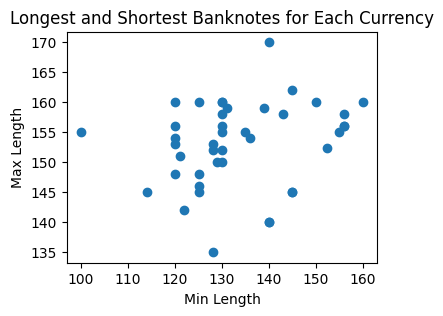

In [5]:
plt.figure(figsize=(4, 3))  
plt.scatter(length['min'], length['max'])
plt.xlabel('Min Length')
plt.ylabel('Max Length')
plt.title('Longest and Shortest Banknotes for Each Currency')
plt.show()

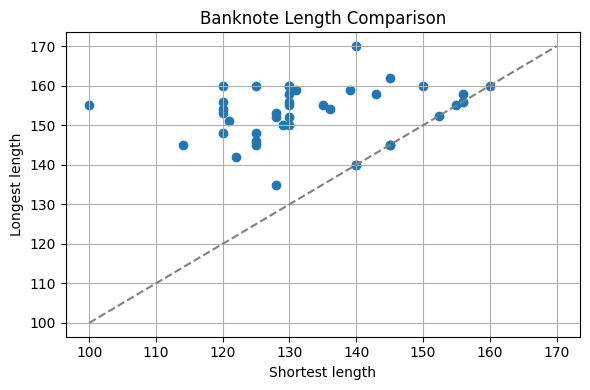

In [6]:
# YOUR CODE HERE (add additional cells as needed)

# compare the shortest and longest banknote lengths for each currency
import matplotlib.pyplot as plt

# Group by currency and get min/max length per currency
length_stats = df.groupby("currency")["length"].agg(["min", "max"]).reset_index()

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(length_stats["min"], length_stats["max"])
plt.xlabel("Shortest length")
plt.ylabel("Longest length")
plt.title("Banknote Length Comparison")
plt.plot([length_stats["min"].min(), length_stats["max"].max()],
         [length_stats["min"].min(), length_stats["max"].max()],
         color="gray", linestyle="--")  # 1:1 line
plt.grid(True)
plt.tight_layout()
plt.show()


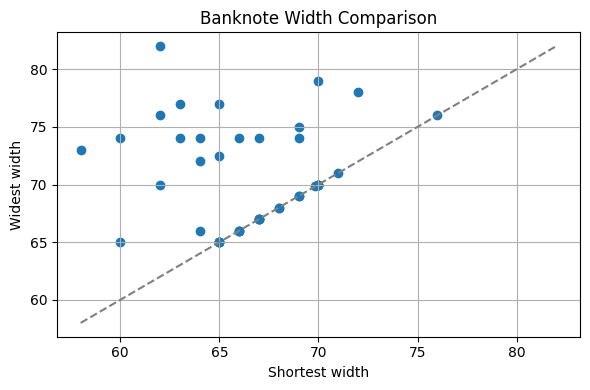

In [7]:
# Repeat for Width
# Group by currency and get min/max width
width_stats = df.groupby("currency")["width"].agg(["min", "max"]).reset_index()

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(width_stats["min"], width_stats["max"])
plt.xlabel("Shortest width")
plt.ylabel("Widest width")
plt.title("Banknote Width Comparison")
plt.plot([width_stats["min"].min(), width_stats["max"].max()],
         [width_stats["min"].min(), width_stats["max"].max()],
         color="gray", linestyle="--")
plt.grid(True)
plt.tight_layout()
plt.show()


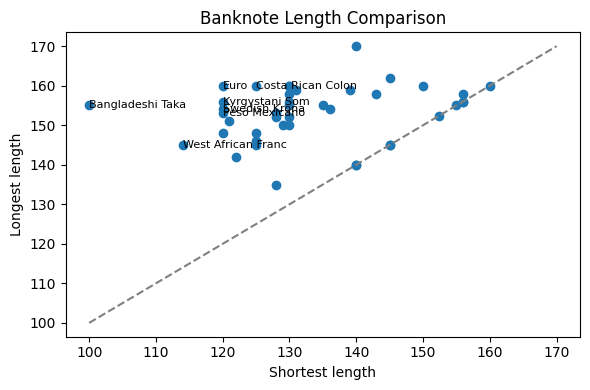

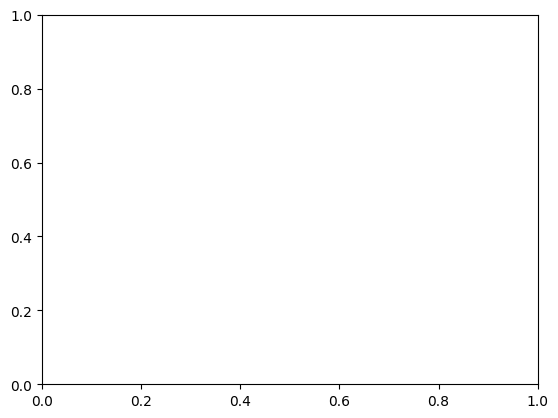

In [11]:
# Label only points with a big difference between min and max
length_stats["diff"] = length_stats["max"] - length_stats["min"]
top_changes = length_stats[length_stats["diff"] > 30]  # adjust threshold

plt.figure(figsize=(6, 4))
plt.scatter(length_stats["min"], length_stats["max"])
plt.xlabel("Shortest length")
plt.ylabel("Longest length")
plt.title("Banknote Length Comparison")

# 1:1 line
plt.plot([length_stats["min"].min(), length_stats["max"].max()],
         [length_stats["min"].min(), length_stats["max"].max()],
         color="gray", linestyle="--")

# Label only selected
for _, row in top_changes.iterrows():
    plt.text(row["min"], row["max"], row["currency"], fontsize=8, ha='left', va='center')

plt.tight_layout()
plt.show()
for i, row in length_stats.head(10).iterrows():  # label top 10
    plt.annotate(row['currency'],
                 (row['min'], row['max']),
                 textcoords="offset points",
                 xytext=(5,0),
                 ha='left', fontsize=7)


In [12]:
def categorize(row):
    if row['length_min'] == row['length_max'] and row['width_min'] == row['width_max']:
        return 'Both same'
    elif row['length_min'] == row['length_max']:
        return 'Length only'
    elif row['width_min'] == row['width_max']:
        return 'Width only'
    else:
        return 'Both vary'

# Get min/max per currency
consistency = df.groupby("currency").agg(
    length_min=("length", "min"),
    length_max=("length", "max"),
    width_min=("width", "min"),
    width_max=("width", "max")
).reset_index()

# Apply category
consistency["category"] = consistency.apply(categorize, axis=1)


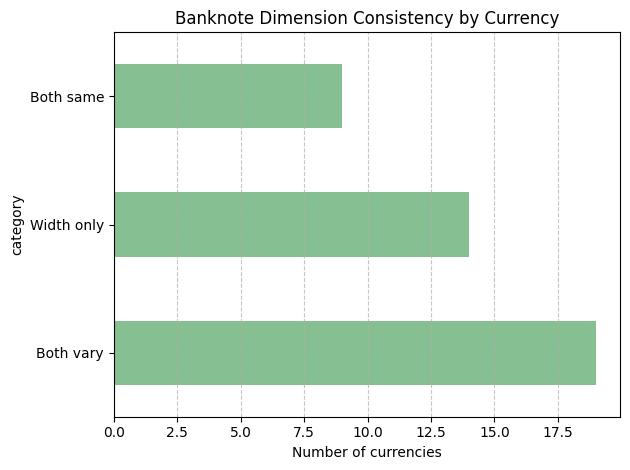

In [13]:
# Count occurrences
category_counts = consistency["category"].value_counts()

# Plot
category_counts.plot(kind="barh", color="#86bf91")
plt.xlabel("Number of currencies")
plt.title("Banknote Dimension Consistency by Currency")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [14]:
# Group by currency and check unique lengths and widths
summary = df.groupby("currency").agg({
    "length": pd.Series.nunique,
    "width": pd.Series.nunique
}).reset_index()

# Rename for clarity
summary.columns = ["currency", "unique_lengths", "unique_widths"]

# Conditions
only_length_constant = (summary["unique_lengths"] == 1) & (summary["unique_widths"] > 1)
only_width_constant = (summary["unique_lengths"] > 1) & (summary["unique_widths"] == 1)
both_vary = (summary["unique_lengths"] > 1) & (summary["unique_widths"] > 1)
both_same = (summary["unique_lengths"] == 1) & (summary["unique_widths"] == 1)

# Total number of currencies
total = len(summary)

# Calculate percentages
results = {
    "Only length consistent": only_length_constant.sum() / total * 100,
    "Only width consistent": only_width_constant.sum() / total * 100,
    "Both vary": both_vary.sum() / total * 100,
    "Both same": both_same.sum() / total * 100
}

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(list(results.items()), columns=["condition", "percentage"])
print(results_df)

                condition  percentage
0  Only length consistent    0.000000
1   Only width consistent   33.333333
2               Both vary   45.238095
3               Both same   21.428571


Using global banknote data, we analyzed the consistency of banknote dimensions — specifically, the length and width of banknotes within each currency.

Key Findings:
- Most currencies vary both length and width across denominations.
→ This design choice helps people easily distinguish notes by size.

- A smaller percentage of currencies only vary the width or only vary the length.
→ This is often a balance between visual design, manufacturing standards, and accessibility.

- A few currencies keep both the length and width the same for all denominations.
→ This uniformity can simplify printing but may reduce usability, especially for the visually impaired.